In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.random import seed
seed(1)
import tensorflow
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
housing_data = pd.read_excel('final project reduced.xlsx')
housing_data.head()

,zip,prop_latitude,prop_longitude,prop_yrbld,prop_landsqft,prop_bldsqft,prop_livingsqft,prop_saledate,prop_saleamt,prop_saledate_prior,prop_saleamt_prior,prop_mtgamt_prior,current financing percent,Prior Financing percent,prop_mtgamt,Duration prior,percentage increase/decrease- prior
0,46217,39.655831,-86.218025,2011,6926.0,2999.0,2399.0,2017-05-08,178407,2011-03-30,156542,154993,0.990101,0.990105,176641.0,2231,0.122557
1,46268,39.874484,-86.247279,1995,11069.0,3412.0,2350.0,2017-05-18,257500,2007-01-16,206150,155000,0.800000,0.751880,206000.0,3775,0.199417
2,46217,39.671222,-86.161665,1955,18992.0,2796.0,2152.0,2018-06-15,158980,2015-02-17,159125,127300,0.990099,0.800000,157406.0,1214,-0.000912
3,46239,39.694670,-86.013174,2006,10759.0,4350.0,2680.0,2016-05-20,293312,2006-08-17,359146,270035,0.800001,0.751881,234650.0,3564,-0.224450
4,46227,39.670611,-86.125501,1957,13983.0,2966.0,1336.0,2016-03-14,122127,2002-10-23,137056,103050,0.990100,0.751882,120918.0,4891,-0.122242


In [18]:
housing_data = pd.get_dummies(housing_data)
housing_data.head()

,zip,prop_latitude,prop_longitude,prop_yrbld,prop_landsqft,prop_bldsqft,prop_livingsqft,prop_saledate,prop_saleamt,prop_saledate_prior,prop_saleamt_prior,prop_mtgamt_prior,current financing percent,Prior Financing percent,prop_mtgamt,Duration prior,percentage increase/decrease- prior
0,46217,39.655831,-86.218025,2011,6926.0,2999.0,2399.0,2017-05-08,178407,2011-03-30,156542,154993,0.990101,0.990105,176641.0,2231,0.122557
1,46268,39.874484,-86.247279,1995,11069.0,3412.0,2350.0,2017-05-18,257500,2007-01-16,206150,155000,0.800000,0.751880,206000.0,3775,0.199417
2,46217,39.671222,-86.161665,1955,18992.0,2796.0,2152.0,2018-06-15,158980,2015-02-17,159125,127300,0.990099,0.800000,157406.0,1214,-0.000912
3,46239,39.694670,-86.013174,2006,10759.0,4350.0,2680.0,2016-05-20,293312,2006-08-17,359146,270035,0.800001,0.751881,234650.0,3564,-0.224450
4,46227,39.670611,-86.125501,1957,13983.0,2966.0,1336.0,2016-03-14,122127,2002-10-23,137056,103050,0.990100,0.751882,120918.0,4891,-0.122242


In [19]:
housing_data = housing_data.drop(columns=['prop_latitude', 'prop_longitude', 'prop_saledate', 'prop_saleamt', 'prop_saledate_prior', 'prop_saleamt_prior', 'prop_mtgamt_prior', 'current financing percent', 'prop_mtgamt'])
housing_data = housing_data.dropna()
housing_data.head()

,zip,prop_yrbld,prop_landsqft,prop_bldsqft,prop_livingsqft,Prior Financing percent,Duration prior,percentage increase/decrease- prior
0,46217,2011,6926.0,2999.0,2399.0,0.990105,2231,0.122557
1,46268,1995,11069.0,3412.0,2350.0,0.751880,3775,0.199417
2,46217,1955,18992.0,2796.0,2152.0,0.800000,1214,-0.000912
3,46239,2006,10759.0,4350.0,2680.0,0.751881,3564,-0.224450
4,46227,1957,13983.0,2966.0,1336.0,0.751882,4891,-0.122242


In [20]:
X = housing_data[['zip', 'prop_yrbld', 'prop_landsqft', 'prop_bldsqft', 'prop_livingsqft', 'Prior Financing percent', 'percentage increase/decrease- prior']]
y = housing_data["Duration prior"].values.reshape(-1, 1)
print(X.shape, y.shape)

(18228, 7) (18228, 1)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [23]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

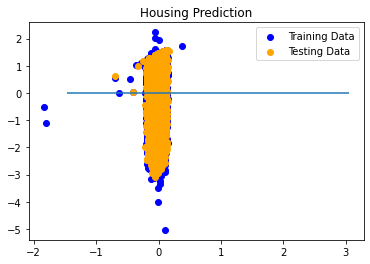

In [25]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Housing Prediction")
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0150740074618798, R2: 0.003906816058973028


In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0150740110435839, R2: 0.003906812544243077


In [28]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.015565916693925, R2: 0.003424105015683576


In [34]:
model.predict(X)

array([[1178.22527258],
       [1161.79587367],
       [1107.98939303],
       ...,
       [1184.86156404],
       [1194.82807639],
       [1083.69127591]])

In [36]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[ 0.02375049  0.06211026 -0.00570104  0.01449006 -0.02014678  0.00402828
   0.02424142]]
y-axis intercept:  [-1.96268247e-15]


In [37]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[[46201.          1900.           436.           462.
     431.             0.         -2987.02075094]]]
Max X Value: [[[4.62900000e+04 2.01800000e+03 4.32629512e+08 2.50040000e+04
   1.30340000e+04 8.43611331e+01 9.58841197e-01]]]


In [38]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [39]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red'

SyntaxError: unexpected EOF while parsing (<ipython-input-39-0ba15af707e4>, line 2)